# Statistics: The Science of Decisions Project Instructions

## Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

## Questions For Investigation

1. What is our independent variable? What is our dependent variable?
2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.
3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.
4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.
5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?
6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

First I will import the dataset with the following code:

In [55]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
# Loading the dataset
dataset = 'stroopdata.csv'
full_dataset = pd.read_csv(dataset)

# Print the first lines
full_dataset


,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


### 1. What is our independent variable? What is our dependent variable?

The independent variable is the word condition (congruent or incongruent) 
The dependent variable is the time to respond in seconds for each of the 24 participants

### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

The appropriate set of hyptheses for this task are the following:

** Null Hypothesis H0 **: ( μi - μc = 0 ) There is no significant difference in the mean response time between viewing the congruent words and the incongruent words.

** Ha - Alternative Hypothesis **: ( μi - μc ≠ 0 ) There is a significant difference in the mean response time between viewing the congruent words and the incongruent words.

The **Dependent Sample two-tailed t-Test** is the appropriate for the following reasons:

- this is the best suited statistical procedure used to determine whether the mean difference between two sets of observations is zero
- we don't know σ for the population, so no z-test possible, instead we use the sample standard deviation.


### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.


In [56]:
congruent = full_dataset['Congruent'] 
congruent_mean = round(congruent.mean(),3)
congruent_std = round(congruent.std(),3)
congruent_min = congruent.min()
congruent_max = congruent.max()
incongruent = full_dataset['Incongruent']
incongruent_mean = round(incongruent.mean(),3)
incongruent_std = round(incongruent.std(),3)
incongruent_min = incongruent.min()
incongruent_max = incongruent.max()
print("Central tendency measures:")
print("The congruent mean is: ", congruent_mean, "sec.")
print("The incongruent mean is: ", incongruent_mean, "sec.")
print("The congruent values lies between ", congruent_min, " and ", congruent_max)
print("The incongruent values lies between ", incongruent_min, " and ", incongruent_max)
print("")
print("Variability measures:")
print("The congruent standard deviation is: ", congruent_std, "sec.")
print("The incongruent standard deviation is: ", incongruent_std, "sec.")

Central tendency measures:
The congruent mean is:  14.051 sec.
The incongruent mean is:  22.016 sec.
The congruent values lies between  8.63  and  22.328
The incongruent values lies between  15.687  and  35.255

Variability measures:
The congruent standard deviation is:  3.559 sec.
The incongruent standard deviation is:  4.797 sec.


### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

[<matplotlib.text.Text at 0xc418cc0>, <matplotlib.text.Text at 0xc3b1160>]

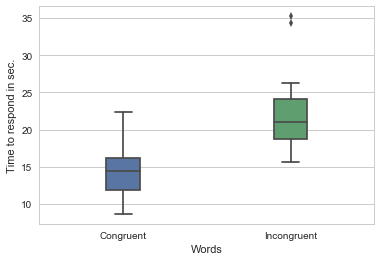

In [57]:
sns.set_style("whitegrid")
ax = sns.boxplot(data=full_dataset, width=0.2)
ax.set(xlabel='Words', ylabel='Time to respond in sec.')

The congruent sample has a wider range than the incongruent, but its means is lower than the incongruent test. We can notice 2 fliers for the incongruent test (at about 35sec.) which could indicate that the response time for a bigger sample could be higher. One last remark is that the mean of the congruent is outside the t-critical of the incongruent test.

Overview of the results:

|         | Congruent | Incongruent |
| ------- | --------- | ----------- |
| Mean    | 14.051 sec  | 22.016 sec      |
| Std Dev.| 3.559 sec  | 4.797 sec      |
| Min.    | 8.63 sec  | 15.687 sec  |
| Max.    | 22.328 sec  | 35.255 sec|



### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

For this statistical test, let's take a 90% confidence interval, so:

Alpha = 0.1

n = 24 (size of the sample)

df= n -1 = 23 (degree of freedom)

tp = +/- 1.714 (tail probability)

We have to calculate the following t-statistic = PE /(s/square(n))
PE = mean(incongruent)-mean(congruent)
s = standard deviation of PE for the full dataset

The sample mean of the difference: 

In [65]:
point_estimate = round((incongruent_mean - congruent_mean),3)
print("sample mean of the difference=",point_estimate)

sample mean of the difference= 7.965


In [66]:
#Diff = sample difference
full_dataset['Diff'] = full_dataset['Incongruent'] - full_dataset['Congruent']

In [67]:
s = round(np.std(full_dataset['Diff'],ddof=1),3)
s

4.865

In [70]:
t = round(point_estimate/(s/math.sqrt(24)),3)
print("t-statistic=", t)

t-statistic= 8.021


So the 
t-statistic > t-critical
8.021 > 1.714

### Experiment task conclusion

We can reject the Null Hypothesis stating that there is no significant difference in the mean response time between viewing the congruent words and the incongruent words. According to my own test, it took me longer to perform the incongruent test as for the congruent test. So the result of this experiment is in line with my expectations.


### 6.Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

To answer these questions, I found some references on google, see reference 5 and 6 in the list below. 2 theories try to explain these effects observed.
1. Speed of processing theory: the interference occures because the brain reads faster than it recognises colour.
2. Selective attention: naming colour requires more attention than reading words. Reading is an automatism,  it deosn't mttaer in waht oredr the ltteers in a wrod are, the olny iprmoetnt tihng is taht the frist and lsat ltteer be at the rghit pclae (ref. 7) whereas recognising colours requires focus. This might be due to practice as well: we read a lot more than we name colour in real life. Maybe a test with young kids not yet fluent in reading would show different results.

Some alternative tests could be:
- Turn the words upside down or rotate them 90 degrees.
- Turn the words "inside out."
- Use non-color words such as "dog" or "house."
- Use nonsense words such as "kiw" or "thoz."
- Compare long words to short words.
- Use emotional words such as "sad" or "happy" or "depressed" or "angry."
- Color only half of the word or color only the first and last letter of each word.

## References
1. For the definition of the dependent sample t-test:
http://www.statisticssolutions.com/manova-analysis-paired-sample-t-test/
    
2. Seaborn graph example: https://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot

3. Z-table: from [t-table](https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg)

4. Standard deviation calculation with numpy: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.std.html

5. Alternative to stroop effect test : https://www.researchgate.net/publication/5987704_Alternative_to_the_Stroop_Color-Word_Test_for_Illiterate_Individuals

6. https://faculty.washington.edu/chudler/words.html

7. MRC cognition: https://www.mrc-cbu.cam.ac.uk/people/matt.davis/cmabridge/